<a href="https://colab.research.google.com/github/JackGallagher41/AI/blob/main/Homework5/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Jack Gallagher**

March 28, 2024

## **Goal: Beam Optimization**

### Setting up Librarys:

In [1]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘Rcpp’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’




In [2]:
# Loading the needed libraries

library(GA)
library(plotly)

Loading required package: foreach

Loading required package: iterators

Package 'GA' version 3.2.4
Type 'citation("GA")' for citing this R package in publications.


Attaching package: ‘GA’


The following object is masked from ‘package:utils’:

    de


Loading required package: ggplot2


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




### Define Functions and Contraints:

In [3]:
#Set constraints on x value
x1 <- seq(10, 80, by = 0.1)
x2 <- seq(10, 50, by = 0.1)
x3 <- seq(0.9, 5.0, by = 0.1)
x4 <- seq(0.9, 5.0, by = 0.1)

#Define the neccessary functions
func1 <- function(x1, x2, x3, x4)
{
  2*x2*x4 + x3*(x1 - 2*x4)
}

func2 <- function(x1, x2, x3, x4)
{
  60000 / (x3 * (x1 - (2 * x4))^3 + (2 * x2 * x4) * ((4 * x4^2) + (3 * x1) * (x1 - (2 * x4))))
}

### Set Lower/Upper Bounds as well as given population parameters:

In [18]:
lowerBound=c(10,10,0.9,0.9)
upperBound=c(80,50,5.0,5.0)
numGenerations=100
populationSize=50
Pc=.75
Pm=.001

### Individual Genetic Algorithm:

In [23]:
#NOTE: looking for minimal value so set function to negative
#Genetic Algorithm of Function 1
GA1 <- ga(type = "real-valued", fitness = function(x) -func1(x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

#Genetic Algorithm of Function 2
GA2 <- ga(type = "real-valued", fitness = function(x) -func2(x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

### Function 1 Genetic Algorithm data:

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -72.85437 
Solution = 
           x1       x2      x3       x4
[1,] 18.88454 12.90954 1.25598 2.108186

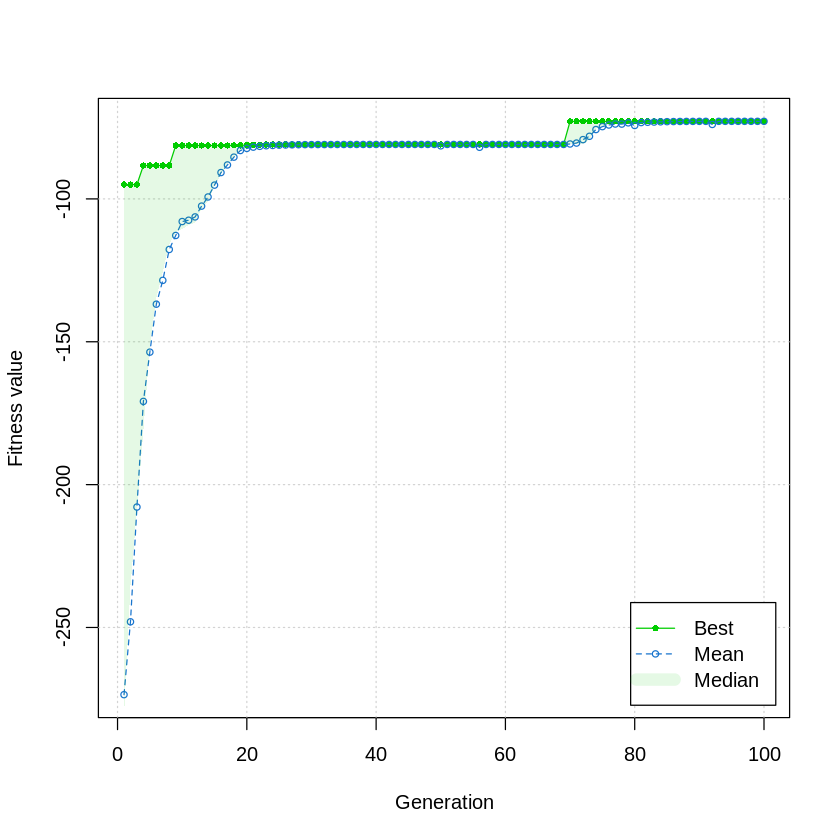

In [24]:
plot(GA1)
summary(GA1)

### Function 2 Genetic Algorithm data:

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -0.008508267 
Solution = 
           x1       x2       x3      x4
[1,] 78.94386 44.79566 2.961223 3.96088

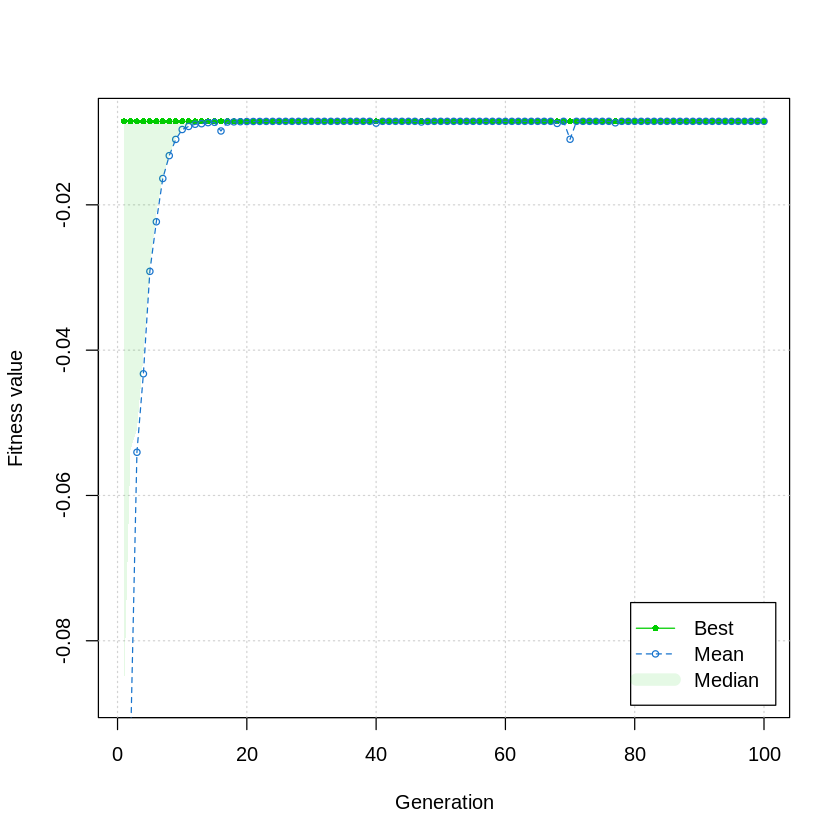

In [25]:
plot(GA2)
summary(GA2)

### Define Weighted Function

In [26]:
func3 <- function(weight1, weight2, x1, x2, x3, x4) {
  weight1 * func1(x1, x2, x3, x4) + weight2 * func2(x1, x2, x3, x4)
}

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.5    **Weight 2:** 0.5





── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -28.84357 
Solution = 
           x1       x2       x3       x4
[1,] 24.25203 12.33203 1.082137 1.355462

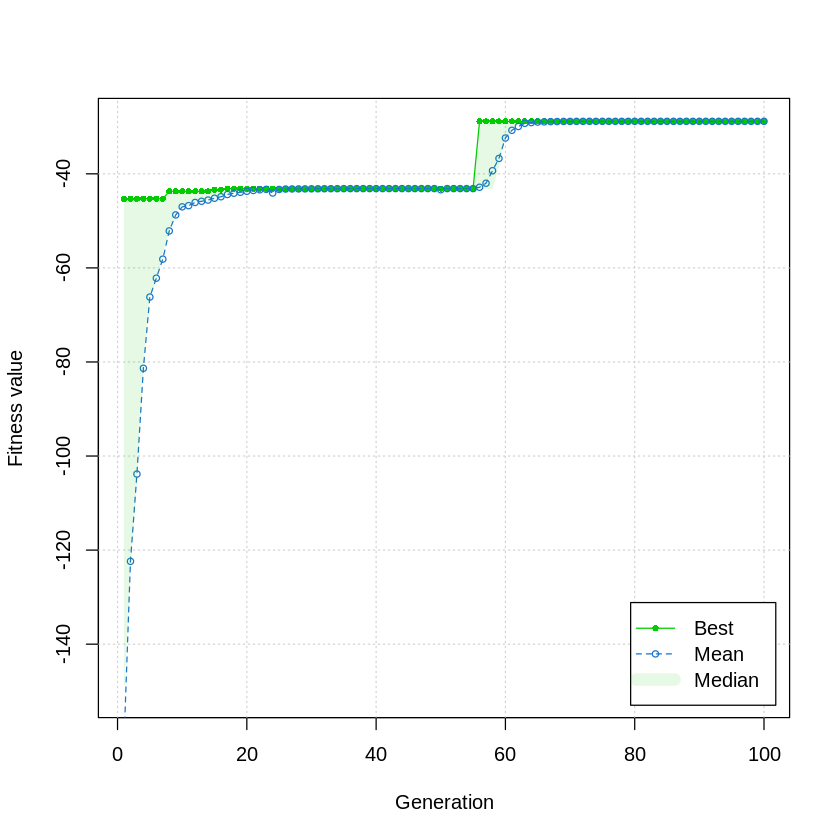

In [27]:
##Genetic Algorithm for Weighted function

weight1 <- 0.5
weight2 <- 0.5

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.1    **Weight 2:** 0.9

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -10.18133 
Solution = 
           x1       x2       x3       x4
[1,] 28.92626 12.99891 2.068986 1.735879

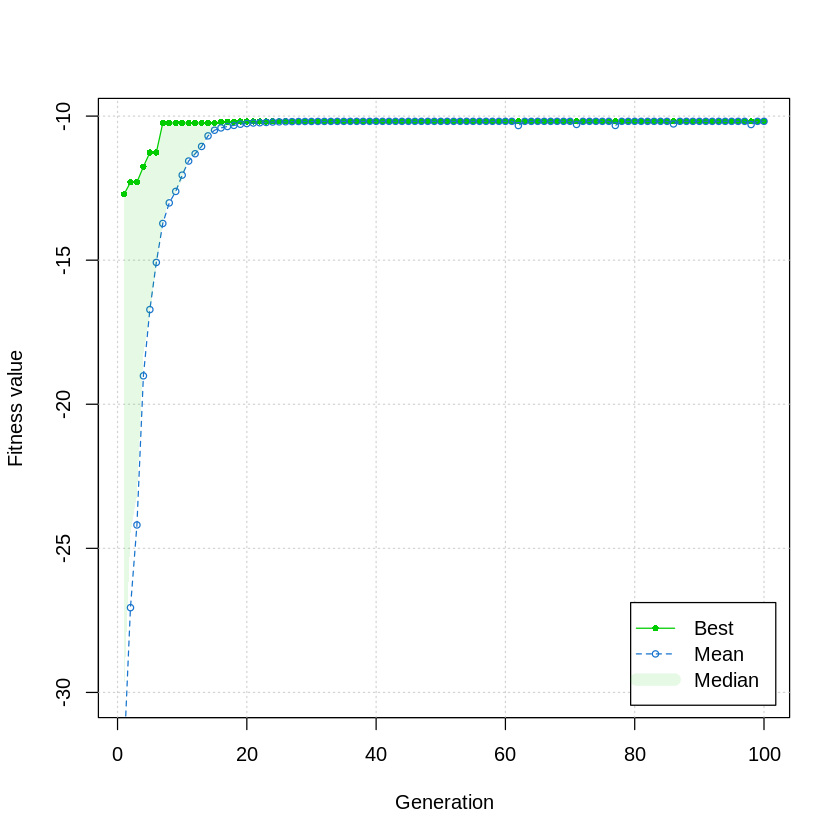

In [28]:
##Genetic Algorithm for Weighted function

weight1 <- 0.1
weight2 <- 0.9

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.2    **Weight 2:** 0.8

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -14.90878 
Solution = 
           x1      x2       x3       x4
[1,] 19.08398 14.6947 2.008107 1.209701

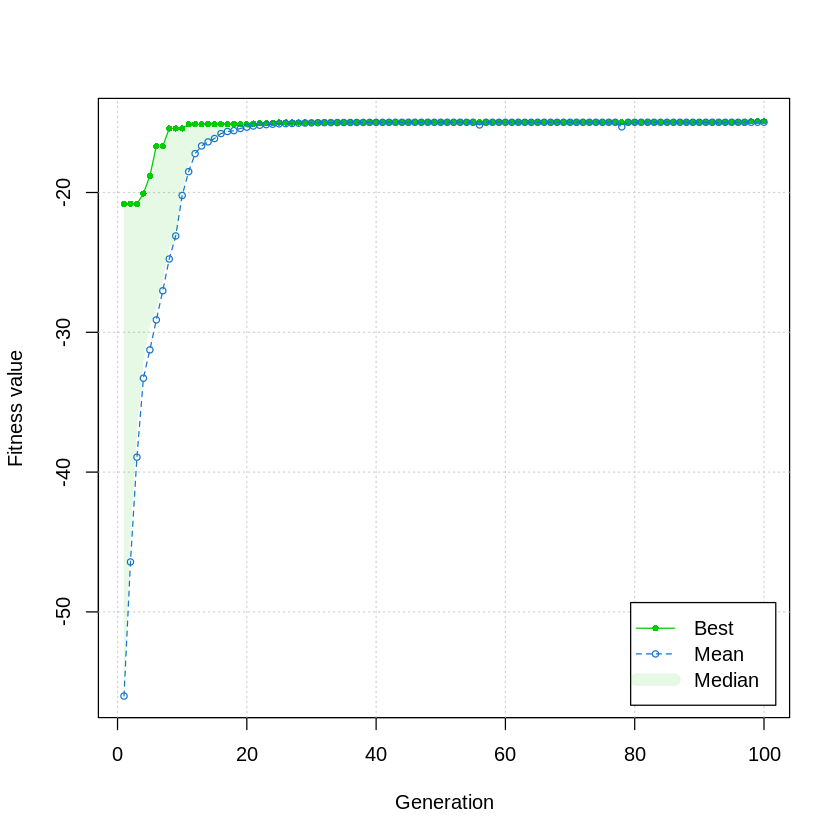

In [29]:
##Genetic Algorithm for Weighted function

weight1 <- 0.2
weight2 <- 0.8

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.3    **Weight 2:** 0.7

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -23.76724 
Solution = 
           x1       x2      x3       x4
[1,] 13.75731 15.36507 2.81516 1.373525

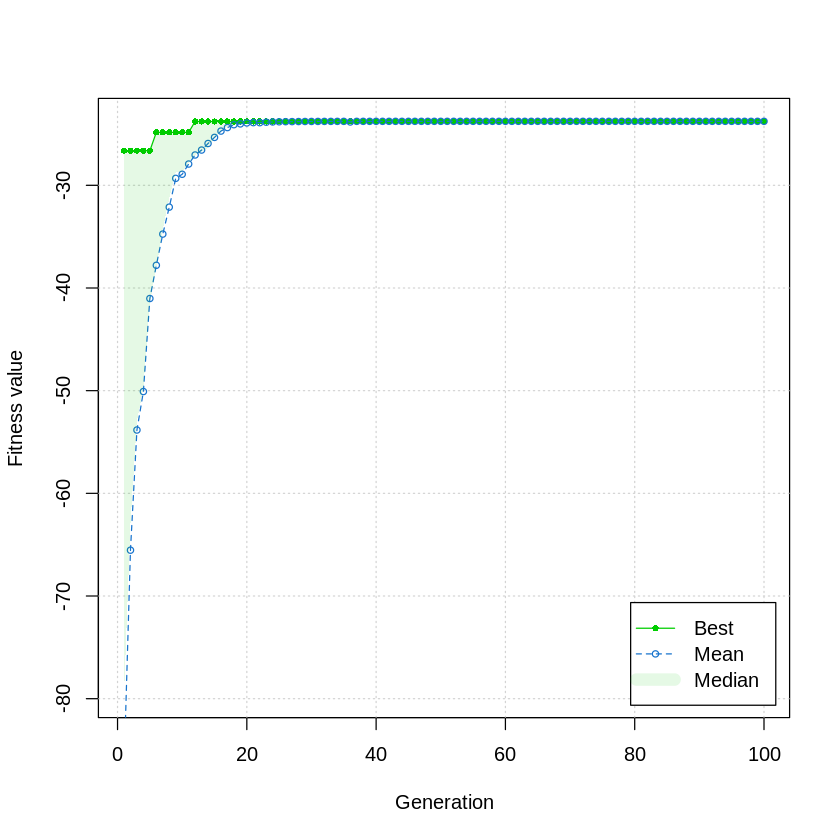

In [30]:
##Genetic Algorithm for Weighted function

weight1 <- 0.3
weight2 <- 0.7

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.4    **Weight 2:** 0.6

*   List item
*   List item



── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -48.41737 
Solution = 
           x1      x2       x3       x4
[1,] 25.58536 18.1403 2.086444 2.088152

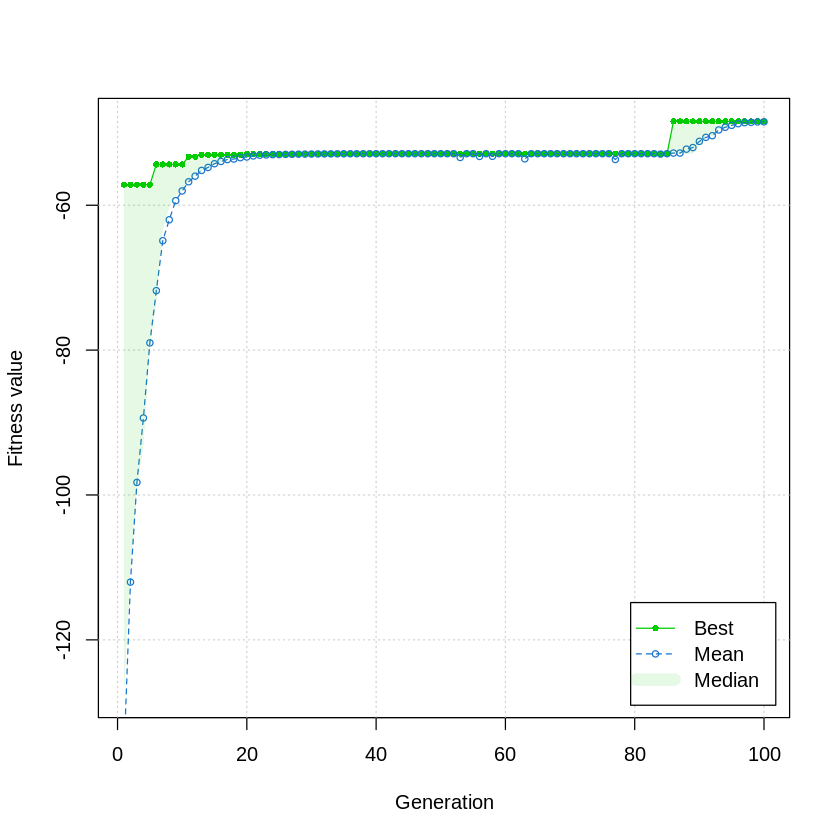

In [31]:
##Genetic Algorithm for Weighted function

weight1 <- 0.4
weight2 <- 0.6

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.6    **Weight 2:** 0.4

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -38.9839 
Solution = 
           x1       x2      x3       x4
[1,] 13.24731 17.41191 1.92878 1.211075

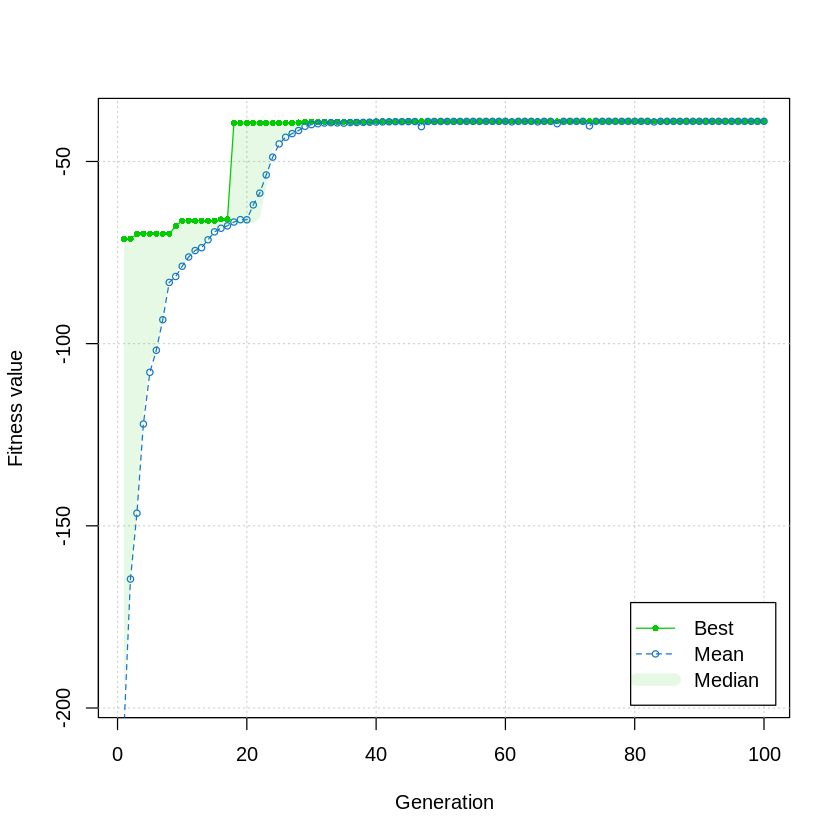

In [32]:
##Genetic Algorithm for Weighted function

weight1 <- 0.6
weight2 <- 0.4

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.7    **Weight 2:** 0.3

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -54.26673 
Solution = 
           x1      x2       x3      x4
[1,] 22.78591 10.9389 2.357021 1.36272

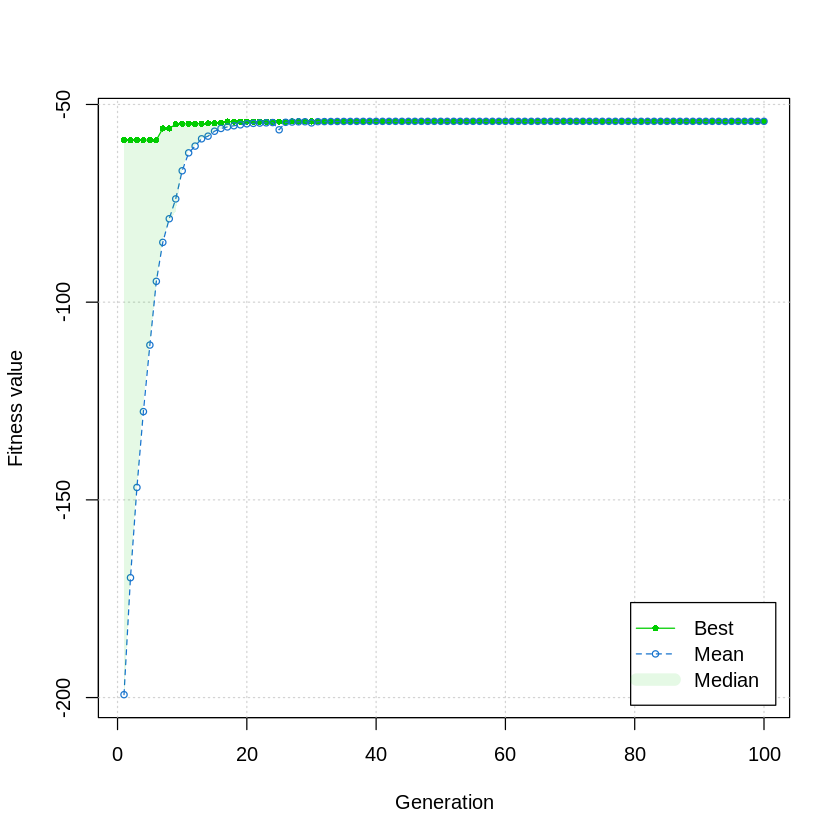

In [33]:
##Genetic Algorithm for Weighted function

weight1 <- 0.7
weight2 <- 0.3

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.8    **Weight 2:** 0.2

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -51.1213 
Solution = 
           x1       x2       x3       x4
[1,] 16.61011 19.91813 1.137038 1.187658

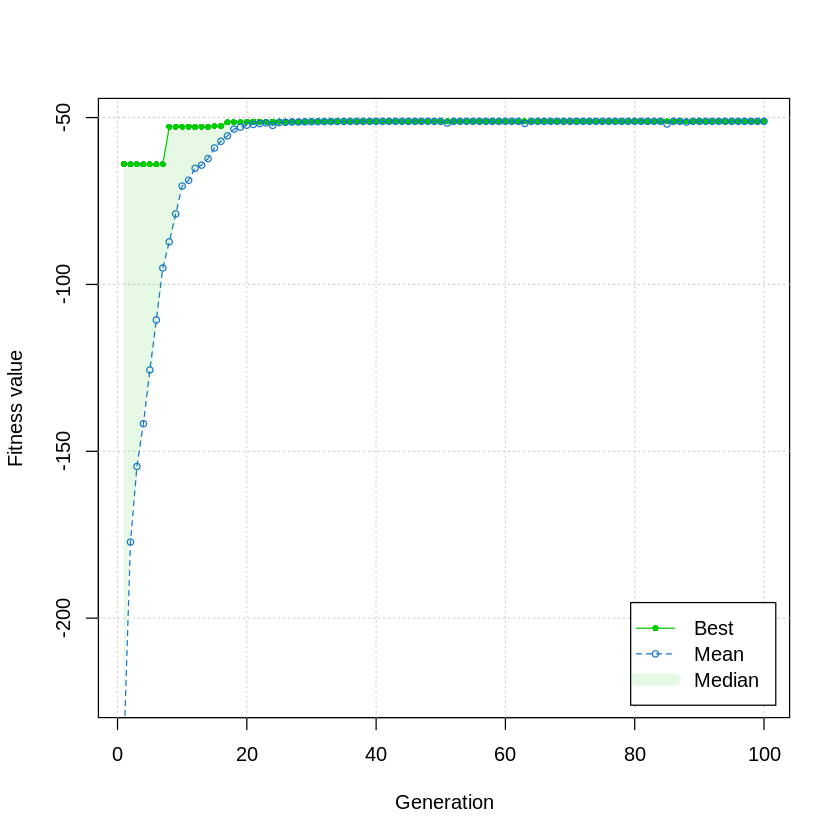

In [34]:
##Genetic Algorithm for Weighted function

weight1 <- 0.8
weight2 <- 0.2

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)

### Weighted Function Genetic Algorithm

### **Weight 1:** 0.9    **Weight 2:** 0.1

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  100 
Elitism               =  2 
Crossover probability =  0.75 
Mutation probability  =  0.001 
Search domain = 
      x1 x2  x3  x4
lower 10 10 0.9 0.9
upper 80 50 5.0 5.0

GA results: 
Iterations             = 100 
Fitness function value = -40.60434 
Solution = 
           x1       x2      x3       x4
[1,] 14.48773 12.06101 0.95259 1.393628

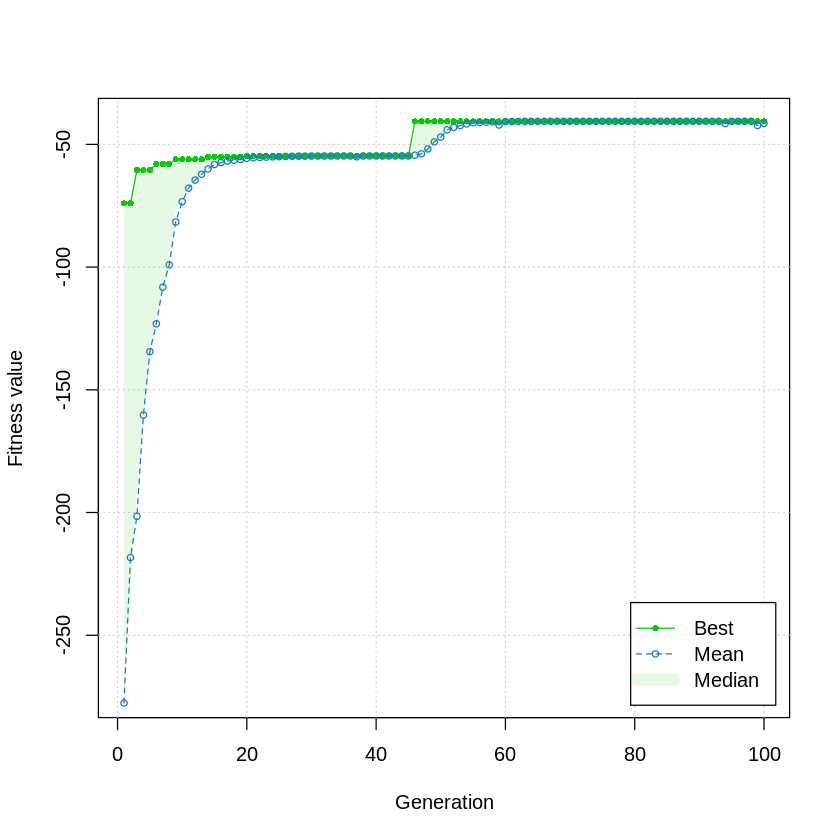

In [35]:
##Genetic Algorithm for Weighted function

weight1 <- 0.9
weight2 <- 0.1

weightedGA <- ga(type = "real-valued", fitness = function(x) -func3(weight1, weight2, x[1], x[2], x[3], x[4]), lower = lowerBound, upper = upperBound,
    maxiter = numGenerations, popSize = populationSize, pcrossover = Pc, pmutation = Pm)

summary(weightedGA)

plot(weightedGA)